C:\Users\sverrirhd\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


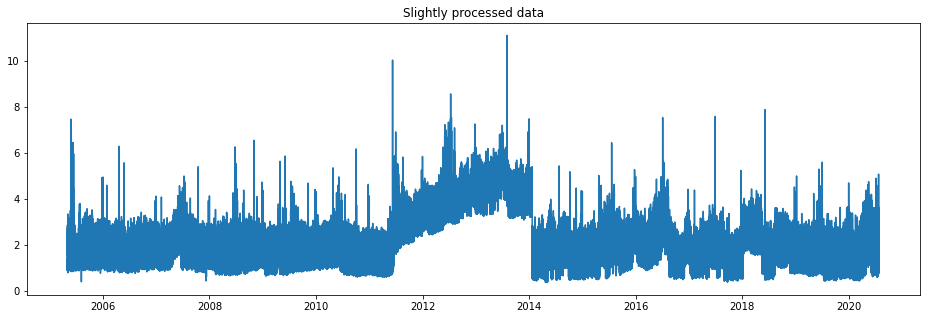

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import NMF
import datetime as dt

df = pd.read_csv('./PARAFAC implementation/Testing data/combined_sensor_data_average_ok_values.csv',index_col = 0)


# df_test = df.loc[df.Name == 'K-RVK-002-RS261']
df_test = df.loc[df.Name == 'K-RVK-036-RS211']
df_test.index = pd.DatetimeIndex(df_test.CTime)
df_test = df_test.sort_index()

x = df_test.loc[(df_test.Val > 0) & (df_test.Val < 12),:].Val
x = x.resample('1h').mean()
x = x.fillna(method='ffill')
weekhour_index = x.index.weekday * 24 + x.index.hour
first_0 = np.argwhere(weekhour_index == 0)[0,0]
last_0 = np.argwhere(weekhour_index == 0)[-1,0]
x = x.iloc[first_0:last_0]
X = x.values.reshape((-1,7,24))
X = X.reshape(-1,24*7)

plt.figure(figsize=(16,5))
plt.plot(x)
plt.title('Slightly processed data')
plt.show()

In [ ]:
from scipy.optimize import nnls

def predict_one_week(b,y):
    # Solve the problem of xb = y
    
    x = nnls(b,y,)
    return x[0]

In [92]:
# best_dict = {}
# from sklearn.base import BaseEstimator
# class NMF_custom(BaseEstimator):
    
#     def __init__(self,
#                  X=None,
#                  n_components=3,
#                  max_iter=10000,
#                  tol = 1e-10,
#                  return_error = False,
# #                  beta_loss = 'kullback-leibler',
# #                  solver='mu',
#                  beta_loss = 'frobenius',
#                  solver='cd',
#                  alpha=0.0,                   
#                  l1_ratio=0.0,
#                  regularization='components',
#                  name = 'Custom NMF implementation with a single flat profile',
#                  errors = []):
        
#         self.params = {
#             'n_components' : n_components,
#             'max_iter' : max_iter,
#             'tol' : tol,
#             'beta_loss' : beta_loss,
#             'solver' : solver,
#             'alpha' : alpha,
#             'l1_ratio' : l1_ratio,
#             'regularization' : regularization,
#             'name':'Custom NMF implementation with a single flat profile',
            
#         }
#         self.errors = []
            
    

#     @ignore_warnings(category=ConvergenceWarning)    
#     def compute_NMF_step(self,update_H=True,iters=1):
#         self.W, self.H, _ = non_negative_factorization(X = self.X,
#                                              W = self.W,
#                                              H = self.H,
#                                              n_components=self.params['n_components'],
#                                              init='custom',
#                                              update_H=update_H,
#                                              solver=self.params['solver'],
#                                              beta_loss=self.params['beta_loss'],
#                                              tol=self.params['tol'],
#                                              max_iter=iters,
#                                              alpha=self.params['alpha'],
#                                              l1_ratio=self.params['l1_ratio'],
#                                              regularization=self.params['regularization'],
#                                              random_state=None,
#                                              verbose=0,
#                                              shuffle=False)
#         p = X.shape[1]
#         self.H[0] = np.ones((1,p))/(p**(1/2))

    
#     def get_params(self,deep=False):
#         return self.params
    
#     def set_params(self, **parameters):
#         for parameter, value in parameters.items():
#             self.params[parameter] = value
            
#         return self
    
#     def fit(self,data,y=None):
        
#         self.nmf = NMF(n_components=self.params['n_components'],
#                        init='custom',
#                        max_iter = 1,
#                        tol=1e-10,
#                        beta_loss = self.params['beta_loss'],
#                        solver = self.params['solver'],
#                        alpha = self.params['alpha'],
#                        l1_ratio = self.params['l1_ratio'])
            
        
#         self.X = data
#         self.n,self.p = self.X.shape
        
# #         self.H = self.get_profiles(self.params['n_components'])
#         self.H = np.abs(np.random.normal(0,1,(self.params['n_components'],168)))
#         self.W = np.abs(np.random.normal(0,1,(self.n, self.params['n_components'])))
# #         self.compute_NMF_step(update_H=False,iters=5)

        
#         last_error = 10e10
#         for i in range(self.params['max_iter']-1):
#             self.compute_NMF_step()
            
            
#             mse = np.mean((self.X - self.transform(self.X))**2)
#             self.errors.append(mse)
#             if (last_error - mse) < self.params['tol']:
#                 break
#             else:
#                 last_error = mse
                
                
#         self.nmf.fit(self.X,H=self.H,W=self.W)
#         self.H[0] = np.ones(self.p)/(self.p**(1/2))
#         self.nmf.components_ = self.H
        
#         self.write_profiles(self.H,last_error)
        
        
#     def fit_transform(self,data,y=None):
#         self.fit(data)
#         return self.transform(data)
        
    
#     def transform(self,data):
#         n_comp = self.params['n_components']
#         X_re_min = np.array([predict_one_week(self.H.T,y).reshape(1,n_comp)@self.H for y in data]).squeeze()
#         return X_re_min
# #         return self.nmf.inverse_transform(self.nmf.transform(data))
        
#     def decompose(self,data):
#         n_comp = self.params['n_components']
#         factors = []
#         for i in range(self.params['n_components']):
#             fac = np.array([predict_one_week(self.H.T,y).reshape(1,n_comp)[:,i]*self.H[i] for y in data]).ravel()
#             factors.append(fac)
            
#         return np.array(factors).T
    
#     def predict_leak(self,data):
#         n_comp = self.params['n_components']
#         leak_prediction = np.array([predict_one_week(self.H.T,y).reshape(1,n_comp)[:,0]*self.H[0] for y in data]).ravel()
#         return leak_prediction
    
#     def predict(self,data):
#         return self.transform(data)
    
#     def get_profiles(self,n):
#         address = './hyperparameter tuning results/profiles/'
#         files = glob(address + f'*_{n}.csv')
#         if n in best_dict.keys():
#             return best_dict[n]
        
#         if len(files) == 0:
#             return np.abs(np.random.normal(0,1,(self.params['n_components'],168)))
        
#         mses = []
#         for f in files:
#             mse = np.float(f[len(address):].split('_')[0])
#             mses.append(mse)
#         best_profiles = files[np.argmin(mses)]
#         profiles = pd.read_csv(best_profiles,index_col=0).values
#         best_dict[n] = profiles
#         return profiles
    
#     def write_profiles(self,profiles,mse):
#         address = './hyperparameter tuning results/profiles/'
#         n = self.params['n_components']
#         files = glob(address + f'*_{n}.csv')
#         n_comps = profiles.shape[0]
#         if len(files) > 0:
#             mses = []
#             for f in files:
#                 tmp_mse = np.float(f[len(address):].split('_')[0])
#                 mses.append(tmp_mse)
#             if np.min(mses) > mse:
#                 pd.DataFrame(profiles).to_csv(f'{address}{mse}_{n_comps}.csv')
#                 best_dict[n_comps] = profiles
#         else:
#             best_dict[n_comps] = profiles
#             pd.DataFrame(profiles).to_csv(f'{address}{mse}_{n_comps}.csv')

            
    

In [94]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [95]:
n,p = X.shape

In [172]:

                    
                    
     
           
from sklearn.decomposition import NMF,non_negative_factorization
@ignore_warnings(category=ConvergenceWarning)  
def compute_NMF_step(X,W,H,iters=1):
    W, H, _ = non_negative_factorization(X = X,
                                         W = W,
                                         H = H,
                                         n_components=H.shape[0],
                                         init='custom',
                                         update_H=True,
                                         solver=params['solver'],
                                         beta_loss=params['beta_loss'],
                                         tol=params['tol'],
                                         max_iter=iters,
                                         alpha=params['alpha'],
                                         l1_ratio=params['l1_ratio'],
                                         regularization=params['regularization'],
                                         random_state=None,
                                         verbose=0,
                                         shuffle=False)
    p = X.shape[1]
    H[0] = np.ones((1,p))
    # Normalize factor so the abundances remain interpretable
    H = H/np.linalg.norm(H,axis=1).reshape(-1,1)
    
    return W,H

In [173]:
n_components=4
max_iter=10000
tol = 1e-10
return_error = False
beta_loss = 'kullback-leibler'
solver='mu'
beta_loss = 'frobenius'
solver='cd'
alpha=0.0 
l1_ratio=0.0
regularization='components'
name = 'Custom NMF implementation with a single flat profile'
errors = []

params = {
    'n_components' : n_components,
    'max_iter' : max_iter,
    'tol' : tol,
    'beta_loss' : beta_loss,
    'solver' : solver,
    'alpha' : alpha,
    'l1_ratio' : l1_ratio,
    'regularization' : regularization,
    'name':'Custom NMF implementation with a single flat profile',
}
      

In [174]:
window_size = 52*2
slide_step = window_size//4
n_slides = 27 # (15*52)//20

X_init = X[:window_size]
W_init = np.abs(np.random.normal(0,1,(window_size, params['n_components'])))
H_init = np.abs(np.random.normal(0,1,(params['n_components'],168)))

 
    

In [175]:
  
W,H = compute_NMF_step(X_init,W_init,H_init,1)

H_over_time = np.zeros((n_slides,n_components,p))
errors = np.zeros(n_slides)
for slide in range(n_slides):
    for i in range(1000):
        W,H = compute_NMF_step(X_init,W,H,1)
        
    start = slide_step*slide
    end = slide_step*slide + window_size
    if end > len(X):
        break
    X_init = X[start:end]
    # Shift W so it doesn't need to be completely re-estimated
    
    # predict new W
    W = np.array([predict_one_week(H.T,week) for week in X_init])
    
    H_over_time[slide] = H
    
    mse = np.mean((X_init - W@H)**2)
    errors[slide] = mse



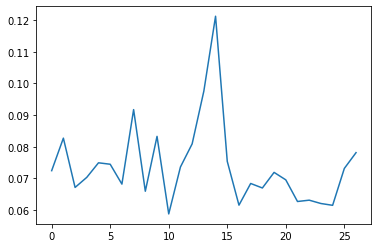

In [176]:
plt.plot(errors[errors > 0])

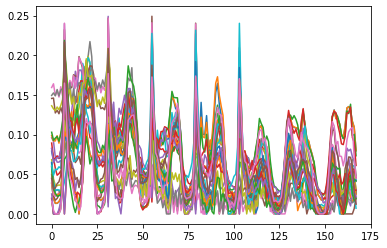

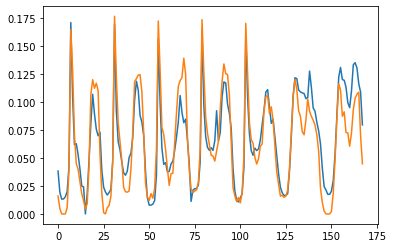

In [177]:
plt.plot(H_over_time[:,1].T)
plt.show()
plt.plot(H_over_time[[0,-1],1].T)
plt.show()

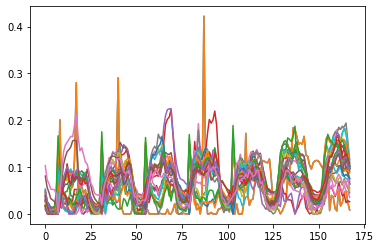

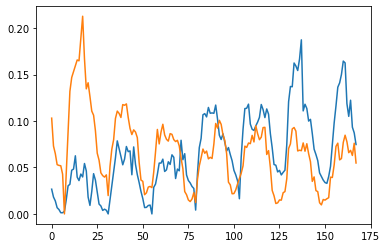

In [178]:
plt.plot(H_over_time[:,2].T)
plt.show()
plt.plot(H_over_time[[2,-1],2].T)
plt.show()

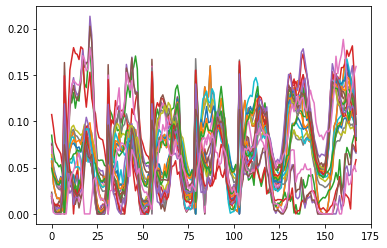

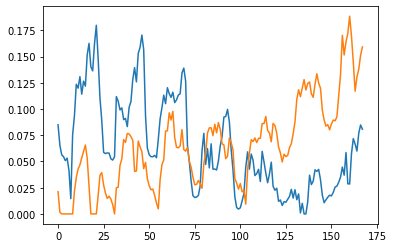

In [179]:
plt.plot(H_over_time[:,3].T)
plt.show()
plt.plot(H_over_time[[2,-1],3].T)
plt.show()

In [113]:
X_re = (W@H).ravel()

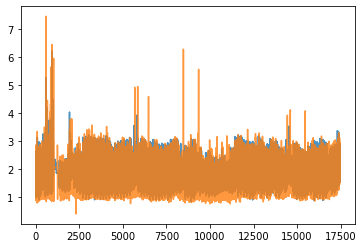

In [114]:
plt.plot(X_re,alpha=0.8)
plt.plot(X_init.ravel(),alpha=0.8)

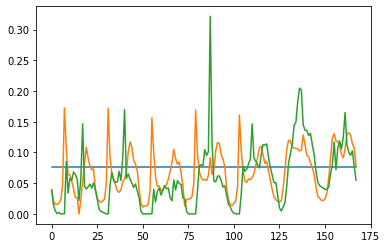

In [115]:
plt.plot(H.T)